# Car Price Prediction

> The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more.

## Import Libraries & Read the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
data = pd.read_csv("/content/car data.csv")

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


> **Insights**
<br>
No missing value

In [6]:
data.shape

(301, 9)

In [7]:
data = data.drop_duplicates()

In [8]:
data.shape

(299, 9)

> **Insights**
<br>
remove dupicated record

## Exploratory Data Analysis (EDA)

In [9]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.566332,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


> Add a new column to data called 'Brand' to know which brand have large number of cars in our data

In [10]:
data['Brand'] = data['Car_Name'].apply(lambda x: x.split(' ')[0])

In [11]:
data['Brand'].value_counts()

,count
Brand,
city,26
Bajaj,25
corolla,17
Royal,17
Honda,17
Hero,15
verna,14
etios,11
fortuner,10


/tmp/ipython-input-859035983.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.index, y=top_brands.values, palette='viridis')


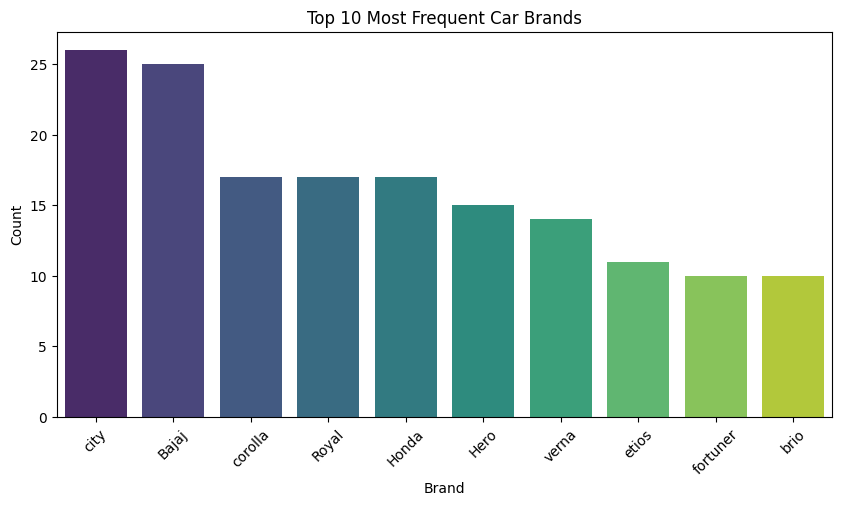

In [12]:
plt.figure(figsize=(10,5))
top_brands = data['Brand'].value_counts().head(10)
sns.barplot(x=top_brands.index, y=top_brands.values, palette='viridis')
plt.title('Top 10 Most Frequent Car Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

> **Insights**
- The most frequent brand in the dataset is **City**, followed by **Bajaj**, **Corolla**, and **Royal**.  
- This indicates the dataset is dominated by these brands, which may bias the model slightly toward predicting prices for them more accurately.  
- Less frequent brands (like **Baleno**, **Omni**, **Camry**) have very few samples, which may limit the model’s learning for those.


/tmp/ipython-input-1289317740.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_avg_price.index, y=brand_avg_price.values, palette='magma')


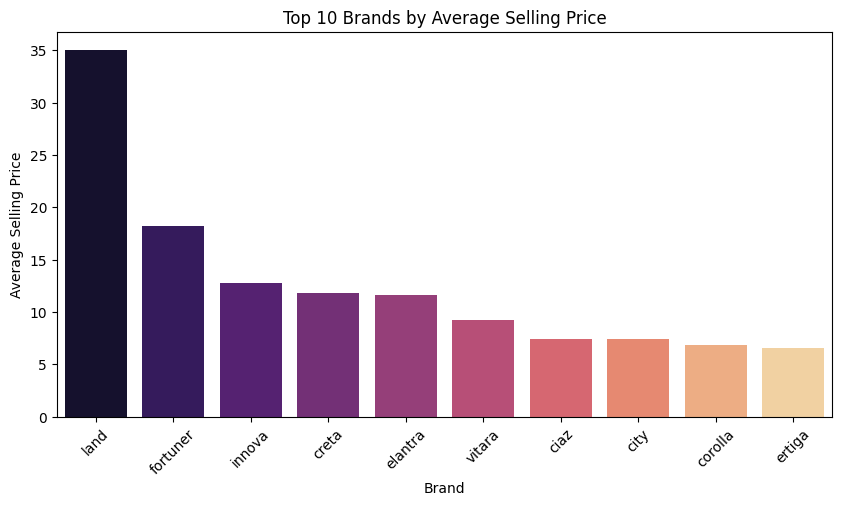

In [13]:
brand_avg_price = data.groupby('Brand')['Selling_Price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=brand_avg_price.index, y=brand_avg_price.values, palette='magma')
plt.title('Top 10 Brands by Average Selling Price')
plt.xlabel('Brand')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45)
plt.show()

> Which features are most correlated with Selling Price

<Axes: >

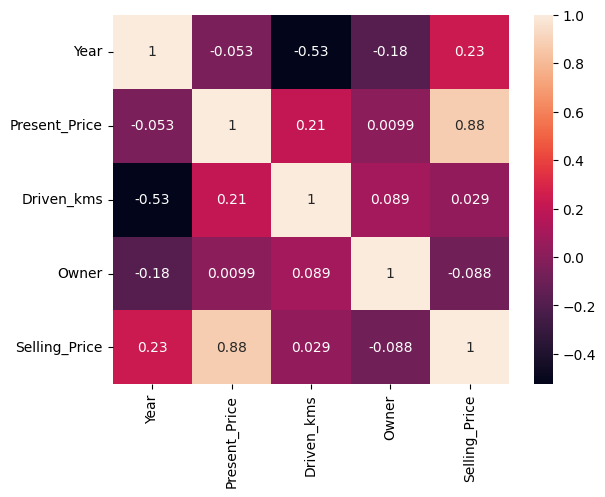

In [14]:
sns.heatmap(data[['Year','Present_Price','Driven_kms','Owner','Selling_Price']].corr(), annot=True)

> **Insights**
<br>
Selling Price & Present Price → 0.88 (Very strong positive correlation)
<br>
Cars with higher current market price tend to sell for higher prices.
<br>
>Selling Price & Year → 0.23
<br>
Newer cars sell for more, but effect is moderate.
<br>
>Selling Price & Driven_kms → 0.03
<br>
Little to no linear effect — could be non-linear.
<br>
>Selling Price & Owner →	-0.09
<br>
Slightly lowers price when owners increase.

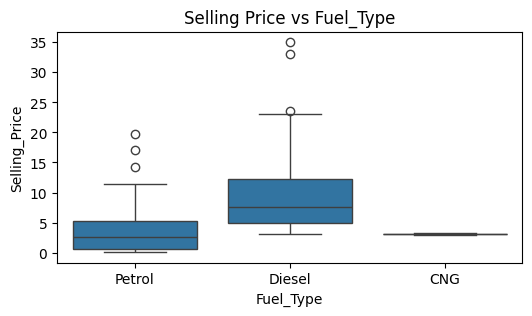

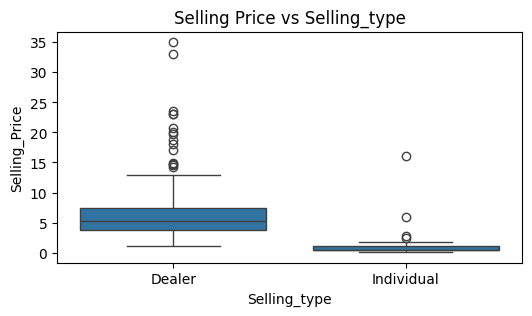

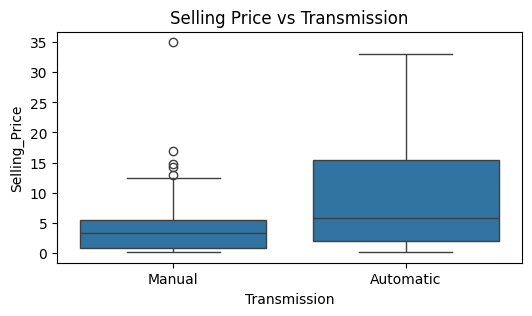

In [15]:
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission']

for col in categorical_features:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=col, y='Selling_Price', data=data)
    plt.title(f"Selling Price vs {col}")
    plt.show()

> **Insights:**
>
>**Fuel_Type:**
>
>Diesel cars have higher median Selling Prices than Petrol and CNG cars.
>
>CNG cars are the cheapest overall.
>
>There are some outliers (points far from the box) — especially in Diesel and >Petrol — possibly luxury or rare cars.
>
>**Selling_type:**
>
>Dealer-sold cars tend to have higher prices and more variation.
>
>Individual sellers usually list lower-priced cars — maybe older or used longer.
>
>**Transmission:**
>
>Automatic cars seem to have higher Selling Prices on average than Manual cars.
>
>But you can see few outliers (cars with unusually high prices).

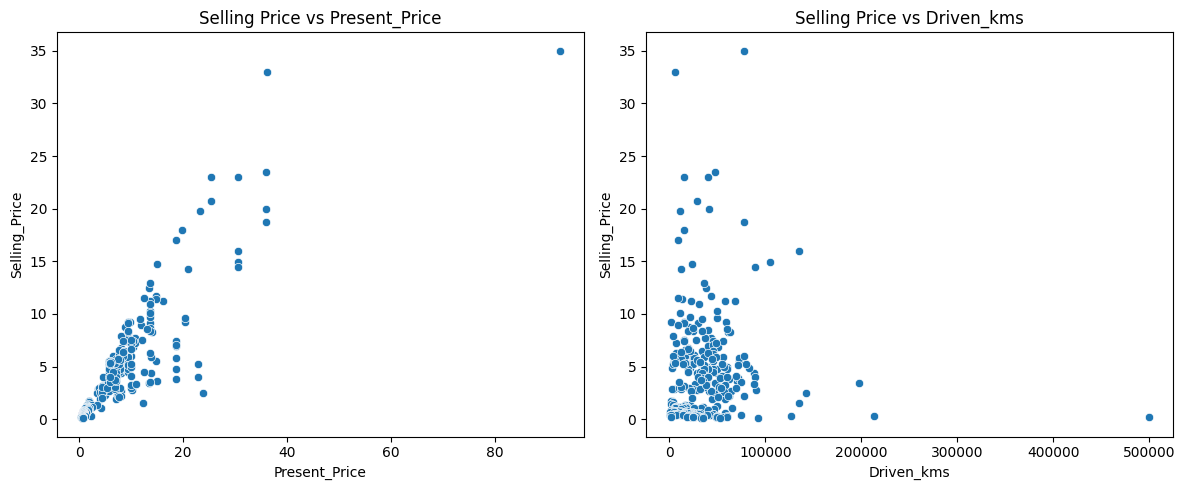

In [16]:
numeric_features = ['Present_Price', 'Driven_kms']

plt.figure(figsize=(12, 5))

for i, feature in enumerate(numeric_features):
    plt.subplot(1, len(numeric_features), i+1)
    sns.scatterplot(x=feature, y='Selling_Price', data=data)
    plt.title(f"Selling Price vs {feature}")

plt.tight_layout()
plt.show()

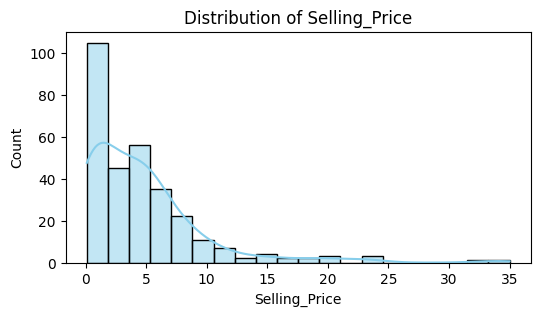

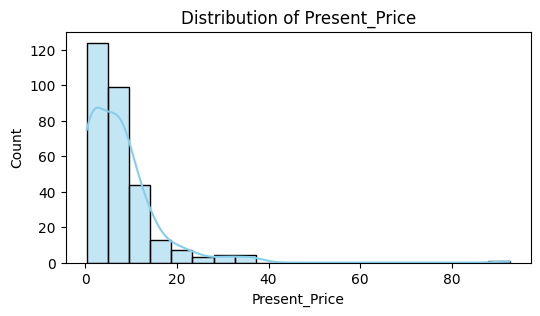

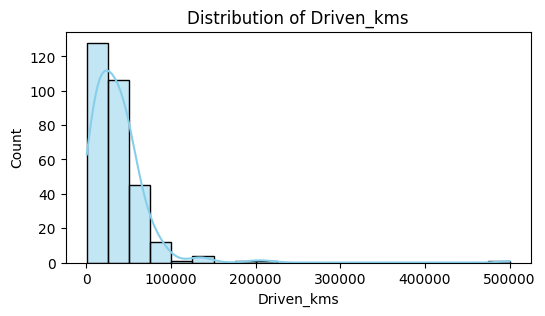

In [17]:
numeric_features = ['Selling_Price', 'Present_Price', 'Driven_kms']

for col in numeric_features:
    plt.figure(figsize=(6,3))
    sns.histplot(data[col], kde=True, bins=20, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.show()

**Insights:**

**Selling_Price:**

Strong right skew — most cars are sold at lower prices, a few at very high ones (outliers).

Suggests you could try log transformation later if using Linear Regression to improve normality.

**Present_Price:**

Also right skewed — most cars originally cheaper, a few are expensive new cars.

Similar story — a few luxury cars create outliers.

**Driven_kms:**

Again right skewed — most cars driven less, but some heavily used cars extend the range.

## Data Preprocessing

> Log Transformation to reduce right skew and make distributions more normal.

In [18]:
import numpy as np

data['Selling_Price_log'] = np.log1p(data['Selling_Price'])
data['Present_Price_log'] = np.log1p(data['Present_Price'])
data['Driven_kms_log'] = np.log1p(data['Driven_kms'])

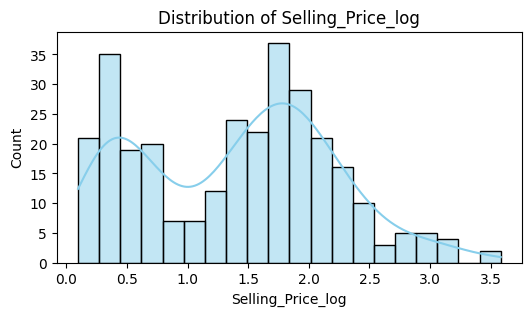

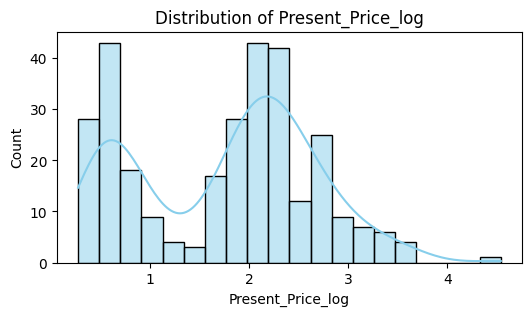

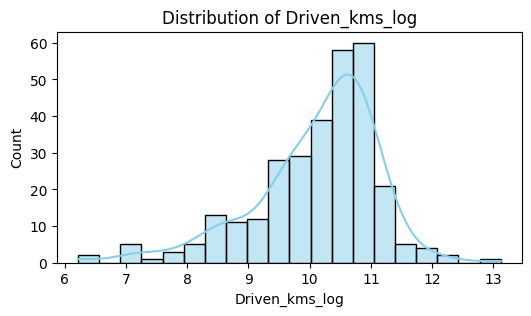

In [20]:
numeric_features = ['Selling_Price_log', 'Present_Price_log', 'Driven_kms_log']

for col in numeric_features:
    plt.figure(figsize=(6,3))
    sns.histplot(data[col], kde=True, bins=20, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.show()

> converted data to do one hot encoding

In [21]:
data = pd.get_dummies(data, columns=['Fuel_Type', 'Selling_type', 'Transmission'], dtype='int')

> Feature Engineering

In [22]:
data['Car_Age'] = 2025 - data['Year']
data.drop('Year', axis=1, inplace=True)
data.drop('Car_Name', axis=1, inplace=True)

In [23]:
data.head()

,Selling_Price,Present_Price,Driven_kms,Owner,Brand,Selling_Price_log,Present_Price_log,Driven_kms_log,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual,Car_Age
0,3.35,5.59,27000,0,ritz,1.470176,1.885553,10.203629,0,0,1,1,0,0,1,11
1,4.75,9.54,43000,0,sx4,1.749200,2.355178,10.668979,0,1,0,1,0,0,1,12
2,7.25,9.85,6900,0,ciaz,2.110213,2.384165,8.839422,0,0,1,1,0,0,1,8
3,2.85,4.15,5200,0,wagon,1.348073,1.638997,8.556606,0,0,1,1,0,0,1,14
4,4.60,6.87,42450,0,swift,1.722767,2.063058,10.656106,0,1,0,1,0,0,1,11


In [24]:
data.shape

(299, 16)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical = ['Present_Price_log', 'Driven_kms_log', 'Car_Age']
data[numerical] = scaler.fit_transform(data[numerical])

In [26]:
data

,Selling_Price,Present_Price,Driven_kms,Owner,Brand,Selling_Price_log,Present_Price_log,Driven_kms_log,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual,Car_Age
0,3.35,-0.228138,-0.254603,0,ritz,1.470176,1.885553,10.203629,0,0,1,1,0,0,1,-0.132992
1,4.75,0.233742,0.156181,0,sx4,1.749200,2.355178,10.668979,0,1,0,1,0,0,1,0.212787
2,7.25,0.269991,-0.770651,0,ciaz,2.110213,2.384165,8.839422,0,0,1,1,0,0,1,-1.170329
3,2.85,-0.396520,-0.814297,0,wagon,1.348073,1.638997,8.556606,0,0,1,1,0,0,1,0.904345
4,4.60,-0.078466,0.142061,0,swift,1.722767,2.063058,10.656106,0,1,0,1,0,0,1,-0.132992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,9.50,0.474622,-0.075193,0,city,2.351375,2.533697,10.433792,0,1,0,1,0,0,1,-0.824550
297,4.00,-0.191889,0.592640,0,brio,1.609438,1.931521,11.002117,0,0,1,1,0,0,1,-0.478771
298,3.35,0.404463,1.309818,0,city,1.470176,2.484907,11.384353,0,0,1,1,0,0,1,1.595904
299,11.50,0.579860,-0.716735,0,city,2.525729,2.602690,9.105091,0,1,0,1,0,0,1,-1.170329


## Train-Test Split

In [27]:
from sklearn.model_selection import train_test_split

X = data.drop(['Selling_Price','Selling_Price_log','Present_Price','Driven_kms','Brand'], axis=1)
y = data['Selling_Price_log']

In [28]:
X.head()

,Owner,Present_Price_log,Driven_kms_log,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual,Car_Age
0,0,1.885553,10.203629,0,0,1,1,0,0,1,-0.132992
1,0,2.355178,10.668979,0,1,0,1,0,0,1,0.212787
2,0,2.384165,8.839422,0,0,1,1,0,0,1,-1.170329
3,0,1.638997,8.556606,0,0,1,1,0,0,1,0.904345
4,0,2.063058,10.656106,0,1,0,1,0,0,1,-0.132992


In [29]:
X.shape

(299, 11)

In [30]:
y.head()

,Selling_Price_log
0,1.470176
1,1.749200
2,2.110213
3,1.348073
4,1.722767


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

## Model Training

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}:")
    print("R2 Score:", r2_score(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Linear Regression:
R2 Score: 0.9568242642930535
MAE: 0.12186889688881991
RMSE: 0.1642876583653503

Random Forest:
R2 Score: 0.9409825376841656
MAE: 0.13030886052467647
RMSE: 0.1920769858334002


**Insights:**

- Both models show high predictive accuracy, with R² values close to 1, meaning they explain over 94–95% of the variance in car prices.

- Linear Regression slightly outperforms Random Forest in terms of both MAE (Mean Absolute Error) and RMSE (Root Mean Squared Error).

- The lower MAE and RMSE for Linear Regression indicate that its predictions are slightly closer to the actual values on average.

## Model Evaluation & Visualization

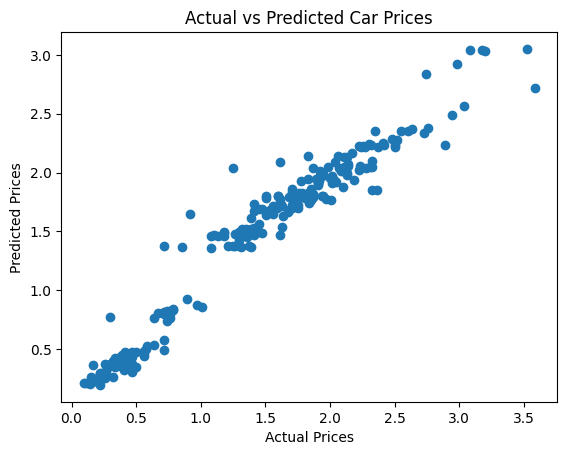

In [33]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Car Prices")
plt.show()

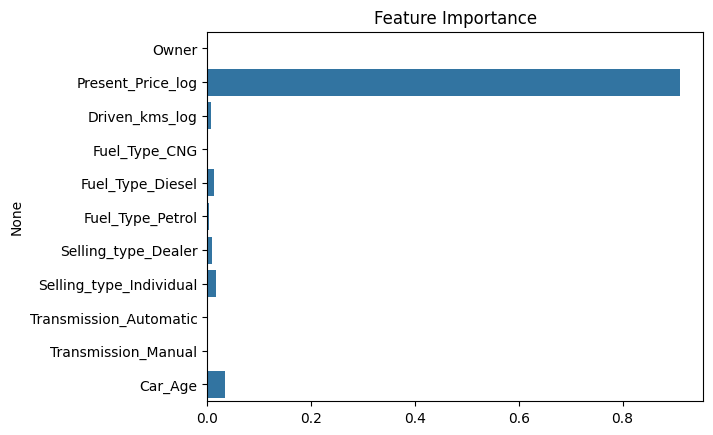

In [34]:
importances = models['Random Forest'].feature_importances_
features = X.columns
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()

**Insights:**

- The “Present_Price_log” variable is by far the most influential feature in predicting car prices.

- Other features like Car_Age and Driven_kms_log have smaller but noticeable importance.

- Variables such as Fuel_Type, Transmission, and Owner contribute very little to the prediction.


- The current price (or market value) of the car is the dominant factor affecting its selling price.

- Car age and kilometers driven also play roles but are secondary factors.

>*This aligns with expectations in real-world car pricing — newer cars with higher market prices tend to have higher resale values.*

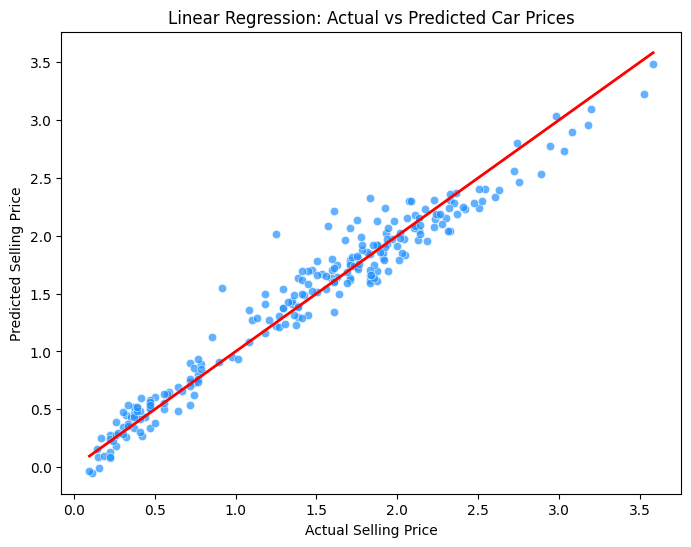

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions for Linear Regression
y_pred_lr = models['Linear Regression'].predict(X_test)

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_lr, color='dodgerblue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Linear Regression: Actual vs Predicted Car Prices')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.show()

- The scatter plots show a strong linear relationship between actual and predicted prices.

- Most points lie close to the diagonal red line, indicating accurate predictions.

- No large deviations or outliers are visible, confirming that the models are generalizing well on the test data.

## Conclusion:

- Both models perform exceptionally well, but **Linear Regression** is slightly more accurate and simpler to interpret.

- The dataset exhibits a strong linear relationship between predictors and car prices, making Linear Regression a suitable and efficient choice.

- If you prioritize interpretability and speed, use Linear Regression.

- If you need robustness against outliers or nonlinear patterns, Random Forest could still be valuable.